In [1]:
from neuron import h, gui
from matplotlib import pyplot

soma = h.Section(name='soma')
dend = h.Section(name='dend')
dend.connect(soma(1))
h.topology()


|-|       soma(0-1)
   `|       dend(0-1)



1.0

Example borrowed from https://nrn.readthedocs.io/en/latest/tutorials/ball-and-stick-2.html and https://www.neuronschool.org/scientific-program/ 

In [2]:
# Surface area of cylinder is 2*pi*r*h (sealed ends are implicit).
soma.L = soma.diam = 12.6157 # Makes a soma of 500 microns squared.
dend.L = 100 # microns
dend.diam = 1 # microns

for sec in h.allsec():
    sec.Ra = 100   # Axial resistance in Ohm * cm
    sec.cm = 1     # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
soma.insert('hh')
soma.gnabar_hh = 0.12  # Sodium conductance in S/cm2
soma.gkbar_hh = 0.036  # Potassium conductance in S/cm2
soma.gl_hh = 0.0003    # Leak conductance in S/cm2
soma.el_hh = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
dend.g_pas = 0.001  # Passive conductance in S/cm2
dend.e_pas = -65    # Leak reversal potential mV
dend.nseg = 10

# Change the maximum sodium conductance of the middle segment of the soma to 0.13
soma(0.5).hh.gnabar = 0.13

# Change the equilibrium potential of the passive mechanism in the middle segment of the dend to -65
dend(0.5).pas.e = -65

for sec in h.allsec():
	for seg in sec:
		for mech in seg:
			print (sec.name(), seg.x, mech.name())

vstim = h.VClamp(dend(1.0))
vstim.dur[2] = 2
vstim.amp[2] = -30

soma 0.5 k_ion
soma 0.5 na_ion
soma 0.5 hh
dend 0.05 pas
dend 0.15 pas
dend 0.25 pas
dend 0.35 pas
dend 0.45 pas
dend 0.55 pas
dend 0.65 pas
dend 0.75 pas
dend 0.85 pas
dend 0.95 pas


In [3]:
h.run()

0.0

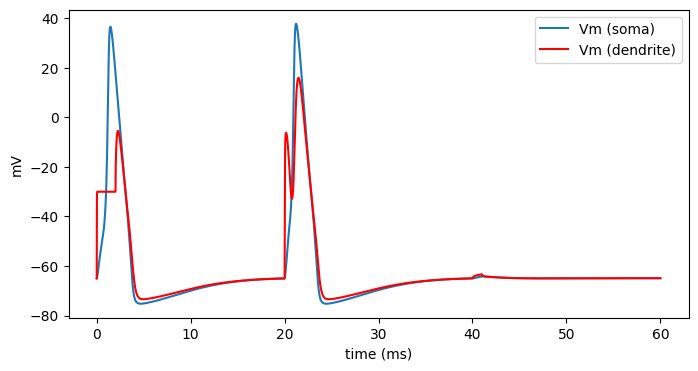

: 

In [ ]:
# add synapse (custom channel)
syn = h.AlphaSynapse(dend(1.0))
syn.e = 0  # equilibrium potential in mV
syn.onset = 20  # turn on after this time in ms
syn.gmax = 0.1  # set conductance in uS
syn.tau = 0.1 # set time constant 

# add current clamp stimulus
stim = h.IClamp(dend(1.0))
stim.amp = 0.01  # input current in nA (0.3)
stim.delay = 40  # turn on after this time in ms
stim.dur = 1  # duration of 1 ms

# record soma voltage and time
t_vec = h.Vector()
v_vec_soma = h.Vector()
v_vec_dend = h.Vector()
v_vec_soma.record(soma(1.0)._ref_v) # change recoding pos
v_vec_dend.record(dend(1.0)._ref_v)
t_vec.record(h._ref_t)

# run simulation
h.tstop = 60 # ms
h.run()  

# plot voltage vs time
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(t_vec, v_vec_soma, label='Vm (soma)')
pyplot.plot(t_vec, v_vec_dend, 'r', label='Vm (dendrite)')
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.legend(loc=0)
pyplot.show()